<a href="https://colab.research.google.com/github/MathewsJosh/Topicos-Computacao-Cientifica-II/blob/main/Aula_04_FiltragemEspaco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Filtragem no domínio do espaço

Neste Notebook veremos como realizar filtragem no domínio do espaço utilizando a biblioteca OpenCV.

## 1 - Conversão da imagem para escala de cinza

Nesse tutorial trabalharemos com imagens em escala de cinza. Utilizaremos o método `cvtColor` com o parâmetro `COLOR_BGR2GRAY` para realizar a conversão. Também precisamos modificar os parâmetros do método `imshow` do Matplotlib para mostrar a imagem em escala de cinza.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


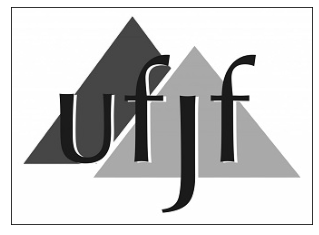

In [3]:
import cv2 as cv
import numpy as np
import math #será necessária para calcular funções trigonométricas
from matplotlib import pyplot as plt

image = cv.imread("/content/drive/MyDrive/ColabFiles/Logo_da_UFJF.jpg")

image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

image.shape

%matplotlib inline

#Observe as modificações para exibição da imagem em escala de cinza
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
#remove as marcações nos eixos
plt.xticks([]), plt.yticks([])
plt.show()

## 2 - Filtragem 2D no OpenCV

O OpenCV apresenta o método `filter2D` para realizar a operação de convolução 2D de uma imagem com um dado *kernel*. Esse método recebe como parâmetros: 
* A imagem de origem
* A profundidade da imagem destino (-1 para manter a mesma profundidade)
* O *kernel* do filtro (uma matriz NumPy)
* A posição do ponto filtrado (opcional, por *default* é o centro do *kernel*)
* Um valor delta a ser adicionado aos pontos filtrados (opcional)
* O método de tratamento de borda (*padding*) (opcional, por *default* é por espelhamento)

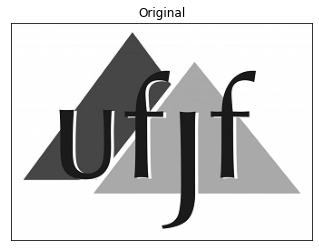

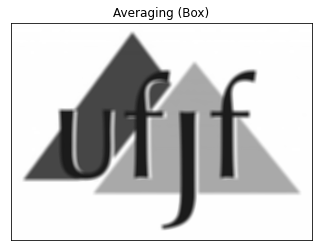

In [4]:
#método ones cria uma matriz de 1's
#Dividimos pelo tamanho do kernel para normalizar o kernel
kernel = np.ones((5,5), np.float32)/25

average = cv.filter2D(image, -1, kernel)

plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title("Original")
plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(average, cmap='gray', vmin=0, vmax=255)
plt.title("Averaging (Box)")
plt.xticks([]), plt.yticks([])
plt.show()

## 3 - Filtros passa-baixa

OpenCV fornece métodos específicos para filtragem utilizando os filtros *box* e Gaussiano. O método `boxFilter` (ou o método `blur`) pode ser utilizado para aplicar o filtro *box*, passando a imagem de origem, a profundidade da saída e o tamanho do *kernel*. O método `GaussianBlur` pode ser utilizado para aplicar um filtro Gaussiano. Os parâmetros desse método são:
* A imagem de origem
* O tamanho do *kernel*
* Desvio padrão em X (sigmaX)
* Desvio padrão em Y (sigmaY, opcional. Se não for passado é utilizado o mesmo valor de X)
* Método de tratamento de borda (opcional, por *default* é por espelhamento)
Se ambos os desvios padrões forem especificados como 0, eles são calculados em função das dimensões do *kernel*

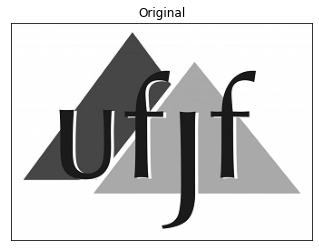

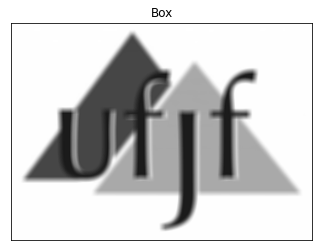

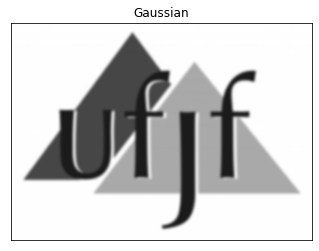

In [5]:
box = cv.boxFilter(image, -1, (7,7))

gaussian = cv.GaussianBlur(image, (7,7), 0)

plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title("Original")
plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(box, cmap='gray', vmin=0, vmax=255)
plt.title("Box")
plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(gaussian, cmap='gray', vmin=0, vmax=255)
plt.title("Gaussian")
plt.xticks([]), plt.yticks([])
plt.show()

## 4 - Filtros passa-alta

O OpenCV possui o método `Sobel` que permite a aplicação do filtro de Sobel. Esse método recebe os seguintes parâmetros:
* A imagem origem
* A profundidade da imagem de saída (-1 para mesma profundidade da imagem de origem)
* A ordem da derivada em x
* A ordem da derivada em y
* O tamanho do kernel (opcional, por *default* é 3)
* Um fator de escala a ser aplicada ao gradiente (opcional, por *default* não se aplica escala)
* Um valor delta a ser adicionado aos pontos filtrados (opcional)
* O método de tratamento de borda (*padding*) (opcional, por *default* é por espelhamento)


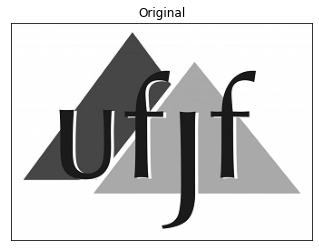

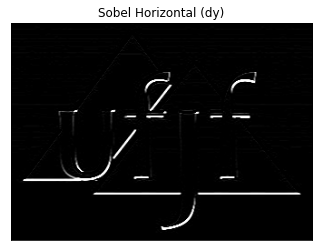

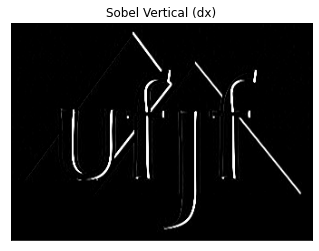

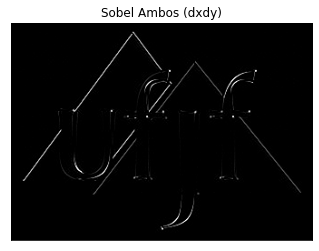

In [6]:
sobelH = cv.Sobel(image, -1, 0, 1)

sobelV = cv.Sobel(image, -1, 1, 0)

sobelHV = cv.Sobel(image, -1, 1, 1)

plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title("Original")
plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(sobelH, cmap='gray', vmin=0, vmax=255)
plt.title("Sobel Horizontal (dy)")
plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(sobelV, cmap='gray', vmin=0, vmax=255)
plt.title("Sobel Vertical (dx)")
plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(sobelHV, cmap='gray', vmin=0, vmax=255)
plt.title("Sobel Ambos (dxdy)")
plt.xticks([]), plt.yticks([])
plt.show()

O método `Laplacian` pode ser utilizado para aplicar o filtro Laplaciano em uma imagem. Os parâmetros desse método são:
* A imagem origem
* A profundidade da imagem de saída (-1 para mesma profundidade da imagem de origem)
* O tamanho do kernel (opcional, por *default* é 1, que significa o cálculo do Laplaciano pelo filtro apresentado em aula)
* Um fator de escala a ser aplicada ao gradiente (opcional, por *default* não se aplica escala)
* Um valor delta a ser adicionado aos pontos filtrados (opcional)
* O método de tratamento de borda (*padding*) (opcional, por *default* é por espelhamento)

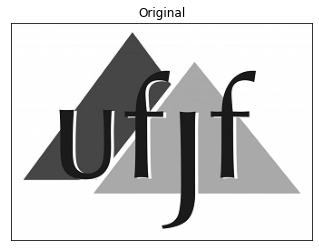

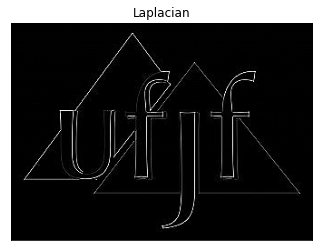

In [7]:
laplacian = cv.Laplacian(image, -1)

plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title("Original")
plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(laplacian, cmap='gray', vmin=0, vmax=255)
plt.title("Laplacian")
plt.xticks([]), plt.yticks([])
plt.show()

## 5 - Exercícios

Utilizando o método `filter2D` aplique o filtro de prewitt vertical e horizontal a uma imagem.

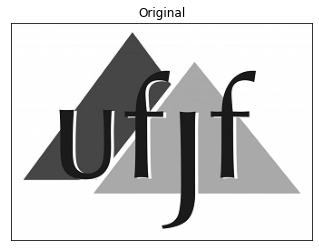

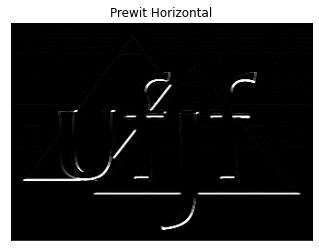

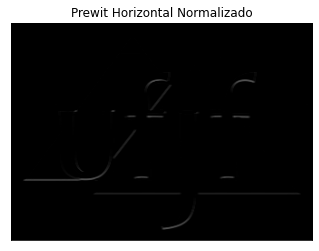

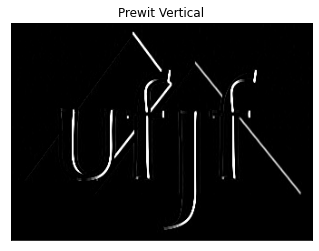

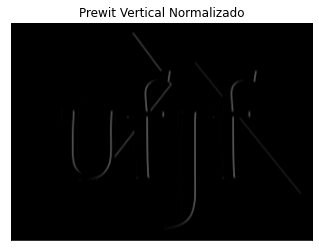

In [17]:
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title("Original")
plt.xticks([]), plt.yticks([])
plt.show()

#Prewitt Horizontal
kernel1 = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
prewitHorizontal = cv.filter2D(image, -1, kernel1)

plt.imshow(prewitHorizontal, cmap='gray', vmin=0, vmax=255)
plt.title("Prewit Horizontal")
plt.xticks([]), plt.yticks([])
plt.show()

kernel1 = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])/9  #Dividimos pelo tamanho do kernel para normalizar o kernel
prewitHorizontal = cv.filter2D(image, -1, kernel1)

plt.imshow(prewitHorizontal, cmap='gray', vmin=0, vmax=255)
plt.title("Prewit Horizontal Normalizado")
plt.xticks([]), plt.yticks([])
plt.show()

#Prewitt Vertical
kernel2 = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewitVertical = cv.filter2D(image, -1, kernel2)

plt.imshow(prewitVertical, cmap='gray', vmin=0, vmax=255)
plt.title("Prewit Vertical")
plt.xticks([]), plt.yticks([])
plt.show()

kernel2 = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])/9  #Dividimos pelo tamanho do kernel para normalizar o kernel
prewitVertical = cv.filter2D(image, -1, kernel2)

plt.imshow(prewitVertical, cmap='gray', vmin=0, vmax=255)
plt.title("Prewit Vertical Normalizado")
plt.xticks([]), plt.yticks([])
plt.show()

Sabendo que o método `add` do OpenCV pode ser utilizado para adicionar duas imagens, determine a adição das imagens estimadas no exercício anterior

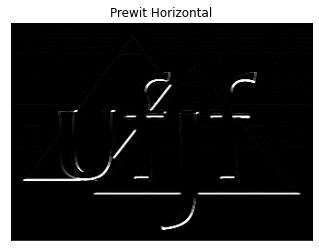

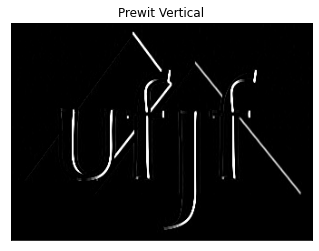

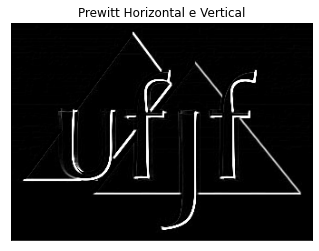

In [24]:
#Prewitt Horizontal
kernel1 = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
prewitHorizontal = cv.filter2D(image, -1, kernel1)

plt.imshow(prewitHorizontal, cmap='gray', vmin=0, vmax=255)
plt.title("Prewit Horizontal")
plt.xticks([]), plt.yticks([])
plt.show()

#Prewitt Vertical
kernel2 = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewitVertical = cv.filter2D(image, -1, kernel2)

plt.imshow(prewitVertical, cmap='gray', vmin=0, vmax=255)
plt.title("Prewit Vertical")
plt.xticks([]), plt.yticks([])
plt.show()

banana = cv.add(prewitHorizontal, prewitVertical)
plt.imshow(banana, cmap='gray', vmin=0, vmax=255)
plt.title("Prewitt Horizontal e Vertical")
plt.xticks([]), plt.yticks([])
plt.show()